
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
from tensorflow import keras
#from keras.datasets import cifar10
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層

model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(Dense( 500))
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

## Adam

In [6]:
# 第三步：編譯, 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 第五步：訓練, 修正 model 參數

batch_size = 256
epochs = 20
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

W0714 21:14:37.088376  6000 deprecation.py:323] From C:\Users\qwerz\Miniconda3\envs\ML100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 - 2s - loss: 0.2964 - accuracy: 0.9116 - val_loss: 0.1459 - val_accuracy: 0.9557
Epoch 2/20
42000/42000 - 1s - loss: 0.1002 - accuracy: 0.9680 - val_loss: 0.1551 - val_accuracy: 0.9539
Epoch 3/20
42000/42000 - 1s - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.1158 - val_accuracy: 0.9666
Epoch 4/20
42000/42000 - 1s - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.1153 - val_accuracy: 0.9698
Epoch 5/20
42000/42000 - 1s - loss: 0.0320 - accuracy: 0.9892 - val_loss: 0.1008 - val_accuracy: 0.9740
Epoch 6/20
42000/42000 - 1s - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.1218 - val_accuracy: 0.9713
Epoch 7/20
42000/42000 - 1s - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.1069 - val_accuracy: 0.9746
Epoch 8/20
42000/42000 - 1s - loss: 0.0217 - accuracy: 0.9925 - val_loss: 0.1265 - val_accuracy: 0.9732
Epoch 9/20
42000/42000 - 1s - loss: 0.0174 - accuracy: 0.9937 - val_loss: 0.1177 - val_accuracy: 0.9724
Epoch 10/20
42

In [9]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1)

result_bool = numpy.equal(result_max, Y_test)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.0914800143960747, 0.9788]

 The accuracy of the model is 0.978800 


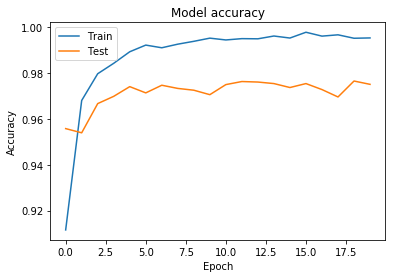

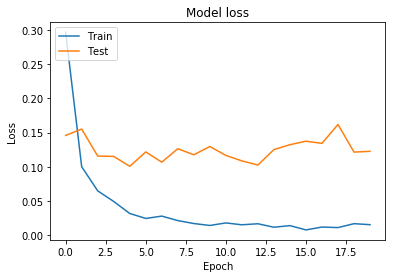

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## SGD

In [12]:
# 第三步：編譯, 
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 第五步：訓練, 修正 model 參數
batch_size = 256
epochs = 20
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 - 1s - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.1144 - val_accuracy: 0.9762
Epoch 2/20
42000/42000 - 1s - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.1108 - val_accuracy: 0.9773
Epoch 3/20
42000/42000 - 1s - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.1085 - val_accuracy: 0.9778
Epoch 4/20
42000/42000 - 1s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.1070 - val_accuracy: 0.9783
Epoch 5/20
42000/42000 - 1s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.1059 - val_accuracy: 0.9783
Epoch 6/20
42000/42000 - 1s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1051 - val_accuracy: 0.9784
Epoch 7/20
42000/42000 - 1s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1045 - val_accuracy: 0.9784
Epoch 8/20
42000/42000 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.1041 - val_accuracy: 0.9785
Epoch 9/20
42000/42000 - 1s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1037 - val_accuracy: 0.9786
Epoch 10/20
42

In [13]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1)

result_bool = numpy.equal(result_max, Y_test)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.07786136903545411, 0.9816]

 The accuracy of the model is 0.981600 


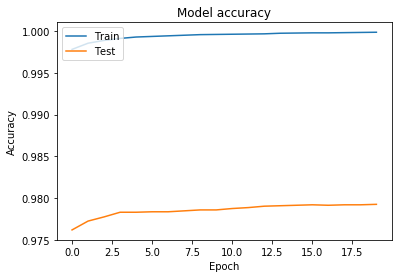

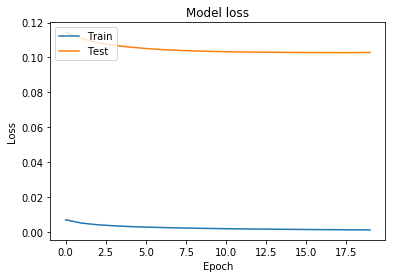

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Rmsprop

In [16]:
# 第三步：編譯, 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 第五步：訓練, 修正 model 參數
batch_size = 256
epochs = 20
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 - 2s - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.1577 - val_accuracy: 0.9771
Epoch 2/20
42000/42000 - 1s - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.1639 - val_accuracy: 0.9788
Epoch 3/20
42000/42000 - 1s - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.1856 - val_accuracy: 0.9762
Epoch 4/20
42000/42000 - 1s - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.2180 - val_accuracy: 0.9756
Epoch 5/20
42000/42000 - 1s - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.1722 - val_accuracy: 0.9799
Epoch 6/20
42000/42000 - 1s - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.1822 - val_accuracy: 0.9783
Epoch 7/20
42000/42000 - 1s - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.2097 - val_accuracy: 0.9769
Epoch 8/20
42000/42000 - 1s - loss: 0.0085 - accuracy: 0.9986 - val_loss: 0.1822 - val_accuracy: 0.9800
Epoch 9/20
42000/42000 - 1s - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.1990 - val_accuracy: 0.9771
Epoch 10/20
42

In [17]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1)

result_bool = numpy.equal(result_max, Y_test)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.2202382518678587, 0.9781]

 The accuracy of the model is 0.978100 


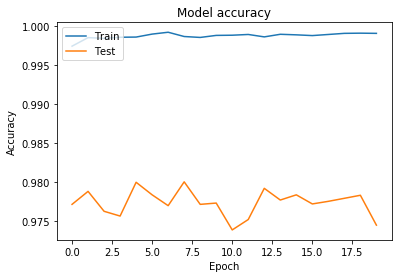

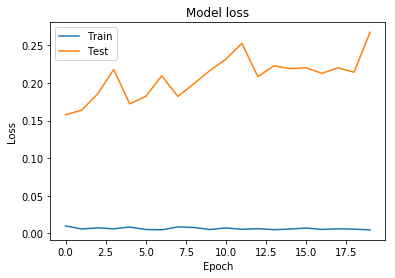

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()